# High School Data

In [16]:
import numpy as np
import sys

data_2010_raw = np.loadtxt("./CleanedData/Data_2010.csv", dtype=str, delimiter=",")
data_2011_raw = np.loadtxt("./CleanedData/Data_2011.csv",  delimiter=',', dtype=str)
data_2012_raw = np.loadtxt("./CleanedData/Data_2012.csv",  delimiter=',', dtype=str)

#Using all the proportions
ethnic_sample = [7,27,28,29,30,31,32,33]


high_data_raw =[]
print len(data_2010_raw)
for i in range(len(data_2010_raw)):
     if data_2010_raw[i,1] == '"H"' and "NA" not in data_2010_raw[i, ethnic_sample] :
        high_data_raw.append(data_2010_raw[i])

high_data_raw = np.asarray(high_data_raw)
print high_data_raw.shape

2082
(357, 36)


In [17]:
print "total number of students", high_data_raw[0][26] # total number of students
reduced_lunches = high_data_raw[0][34] # free and reduced lunches
remediation = high_data_raw[0][35] # remediation


total number of students 1930


In [18]:
ethnic_hs_data = high_data_raw[:,ethnic_sample]


hs_targets = ethnic_hs_data[:,0].astype(float)
hs_features = ethnic_hs_data[:,1:].astype(float)


## Cross Validation

In [19]:
from sklearn.cross_validation import train_test_split
hs_features_train, hs_features_test, hs_target_train, hs_target_test = train_test_split(hs_features, hs_targets, test_size=0.33, random_state=42)
print(hs_features_train.shape)
print(hs_features_test.shape)
print(hs_target_train.shape)
print(hs_target_test.shape)

(239, 7)
(118, 7)
(239,)
(118,)


## k-nearest (may not be best since there are only 6 useable high school data entries)

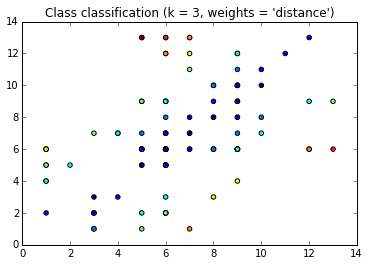

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

n_neighbors = 3

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(hs_features_train, hs_target_train)
    hs_pred = clf.predict(hs_features_test)
    
    colors = []

    colors = (abs(hs_target_test - hs_pred))
    
    %matplotlib inline
    
    plt.figure()
    plt.scatter(hs_target_test, hs_pred, c= colors)

    # Plot also the training points
    plt.title("Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

[[ 0  1  0  2  2  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  3  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2  0  0  0  0  0  0]
 [ 1  1  0  0  2  5  1  0  2  0  0  0  2]
 [ 0  4  1  0  7 11  3  1  3  0  0  2  2]
 [ 1  0  0  0  0  2  2  1  0  0  1  1  2]
 [ 0  0  1  0  0  3  0  2  1  2  0  0  0]
 [ 0  0  0  1  0  7  1  2  3  4  1  2  0]
 [ 0  0  0  0  0  0  1  1  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0]]


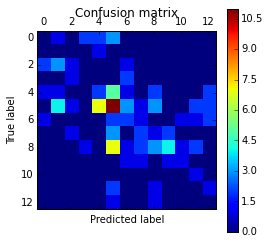

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(hs_target_test, hs_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from sklearn import metrics 
#Computing various score metrics ( adapted from Daniel's adaptation of an example provided by scikit-learn)

trueLabel = hs_target_test
predLabel = hs_pred

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.033398
V measure score : 0.296879
Adjusted Mutual Info score : 0.079235
Mutual Info score : 0.660094


## Naive Bayes

In [23]:
from sklearn import naive_bayes
from sklearn import metrics

gnb = naive_bayes.GaussianNB()
gnb.fit(hs_features_train,hs_target_train)
predict_c = gnb.predict(hs_features_test)

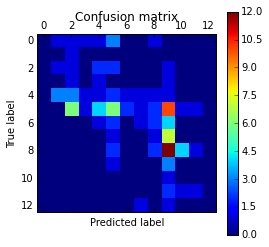

In [24]:
cm = confusion_matrix(hs_target_test, predict_c)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = hs_target_test
predLabel = predict_c

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.016878
V measure score : 0.233213
Adjusted Mutual Info score : 0.033068
Mutual Info score : 0.482457


### Decision Tree

In [26]:
from sklearn import cross_validation
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(hs_features_train, hs_target_train)
hs_pred_dt = dt.predict(hs_features_test)

print (hs_pred_dt)

[  5.  10.   6.   6.   6.   6.   1.   6.   6.   2.   6.   6.   6.   2.   6.
   6.   6.   6.   6.   6.   6.   6.   1.   6.   6.   6.   6.   6.   6.   6.
   6.   6.   1.   6.   6.   6.   2.   4.   6.   6.   6.   6.   2.   6.   6.
   6.   6.   2.  10.   6.   1.   6.   1.   2.   6.   6.   1.   6.   2.   5.
   1.   6.   5.   6.   9.   6.   6.   6.   6.   6.   6.   6.  12.   5.   6.
   6.   6.   6.   5.   6.   6.   6.   1.   2.   6.   1.   5.   2.   6.   6.
   2.   5.   6.  12.   5.   6.   6.   6.   6.   6.   6.   2.   6.   7.   6.
  12.   6.   6.   6.   6.   5.   6.   6.   6.   6.  12.   5.   6.]


In [27]:
trueLabel = hs_target_test
predLabel = hs_pred_dt


from sklearn import metrics


print "Accuracy: " + str(metrics.accuracy_score(trueLabel, predLabel))

fpr, tpr, thresholds = metrics.roc_curve(trueLabel, predLabel, pos_label=2)
print "AUC score: " + str(metrics.auc(fpr, tpr))

Accuracy: 0.21186440678
AUC score: 0.598290598291


## Decision Tree with binary grades

In [30]:
data_2010_raw = np.loadtxt("./CleanedData/Data_2010.csv", dtype='string', delimiter=",")

#Using all the proportions
ethnic_sample = [7,27,28,29,30,31,32,33]


high_data_raw =[]


for i in range(len(data_2010_raw)):
     if data_2010_raw[i,1] == '"H"' and "NA" not in data_2010_raw[i, ethnic_sample] :
        if int(data_2010_raw[i, 7]) < 5:
            data_2010_raw[i,7] = 0
            high_data_raw.append(data_2010_raw[i, :])
        else:
            data_2010_raw[i,7] = 1
            high_data_raw.append(data_2010_raw[i, :])

high_data_raw = np.asarray(high_data_raw)
print high_data_raw

[['10' '"H"' '"ABRAHAM LINCOLN HIGH SCHOOL"' ..., '0.3108808' '93'
  '0.785714']
 ['15' '"H"' '"ACADEMY OF CHARTER SCHOOLS"' ..., '0.6125574' '15.5' 'NA']
 ['22' '"H"' '"LESTER R ARNOLD HIGH SCHOOL"' ..., '0' '51.3' 'NA']
 ..., 
 ['9733' '"H"' '"WRAY HIGH SCHOOL"' ..., '0.5181347' '47.7' 'NA']
 ['9785' '"H"' '"YOUTH & FAMILY ACADEMY CHARTER"' ..., '0' '81.6' 'NA']
 ['9799' '"H"' '"YUMA HIGH SCHOOL"' ..., '0' '38.6' 'NA']]


In [31]:
ethnic_hs_data = high_data_raw[:,ethnic_sample]


hs_targets = ethnic_hs_data[:,0].astype(float)
hs_features = ethnic_hs_data[:,1:].astype(float)

In [32]:
from sklearn import cross_validation
from sklearn import tree

from sklearn.cross_validation import train_test_split
hs_features_train, hs_features_test, hs_target_train, hs_target_test = train_test_split(hs_features, hs_targets, test_size=0.33, random_state=42)


dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(hs_features_train, hs_target_train)
hs_pred_dt = dt.predict(hs_features_test)

print (hs_pred_dt)

[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.]


In [ ]:
trueLabel = hs_target_test
predLabel = hs_pred_dt


from sklearn import metrics


print "Accuracy: " + str(metrics.accuracy_score(trueLabel, predLabel))

fpr, tpr, thresholds = metrics.roc_curve(trueLabel, predLabel, pos_label=1)
print "AUC score: " + str(metrics.auc(fpr, tpr))

In [ ]:
## loop through and plot thing!

import matplotlib.pyplot as plt

% matplotlib inline
x = range(1, 10)

print x
y = []
for i in x:
    print i 
    dt = tree.DecisionTreeClassifier(max_depth=i)
    dt.fit(hs_features_train, hs_target_train)
    hs_pred_dt = dt.predict(hs_features_test)
    fpr, tpr, thresholds = metrics.roc_curve(hs_target_test, hs_pred_dt, pos_label=1)
    y.append(metrics.auc(fpr, tpr))
    

plt.plot(x, y)

### lol 

Why is this decision tree so jankkkkk.

## That backwards stuff we talked about in class

In [33]:
# get all the scores 
# see if scores will predict socioeconomic status with free/reduced lunch

import numpy as np
import sys

data_2010_raw = np.loadtxt("./CleanedData/Data_2010.csv", dtype=str, delimiter=",")
data_2011_raw = np.loadtxt("./CleanedData/Data_2011.csv",  delimiter=',', dtype=str)
data_2012_raw = np.loadtxt("./CleanedData/Data_2012.csv",  delimiter=',', dtype=str)


#combine the data
data_2010_raw = np.append(data_2010_raw, data_2011_raw, axis=0)
data_2010_raw = np.append(data_2010_raw, data_2012_raw, axis=0)
print "final total shape: ", data_2010_raw.shape

#Using all the proportions
ethnic_sample = [7,27,28,29,30,31,32,33]
status_sample = [18, 34, 35] #gradrate, lunchrate, remediationrate

all_samples = np.append(ethnic_sample, status_sample)

high_data_raw =[]
for i in range(len(data_2010_raw)):
     if data_2010_raw[i,1] == '"H"' and "NA" not in data_2010_raw[i, ethnic_sample]:
        high_data_raw.append(data_2010_raw[i])

high_data_raw = np.asarray(high_data_raw)
print "print all viable shapes lol: ", high_data_raw.shape




final total shape:  (6113, 36)
print all viable shapes lol:  (1035, 36)


In [34]:
# get index of the thing we want lol
data_2010_name = np.loadtxt("./CleanedData/Data_2010_Names.csv", delimiter = ",", dtype="string")

def getIndex(data_2010_name, toGet):
    i = 0
    for name in (data_2010_name):
        if name == toGet:
            return i
        else:
            i = i + 1
    print -1


print "col index overall achieved grades:", getIndex(data_2010_name, '"OverallAchievedGrade"')



col index overall achieved grades: 9


In [35]:
#converting data to trinary

hs_features = []
hs_grad_target = []
hs_lunch_targets = []
hs_remediation_targets = []

for i in range(len(high_data_raw)):
    if "NA" not in high_data_raw[i, 9] and "NA" not in high_data_raw[i, 34]:
        if int(high_data_raw[i, 9]) > 9:
            hs_features.append(2)
        elif int(high_data_raw[i, 9]) > 5:
            hs_features.append(1)
        else:
            hs_features.append(0)
        if float(high_data_raw[i, 34]) > 67:
            hs_lunch_targets.append(2)
        elif float(high_data_raw[i, 34]) > 33:
            hs_lunch_targets.append(1)
        else:
            hs_lunch_targets.append(0)

hs_features = np.array(hs_features)
hs_lunch_targets = np.array(hs_lunch_targets)
print "achieved grades ", hs_features.shape
print "lunch targets to predict", hs_lunch_targets.shape


achieved grades  (1027,)
lunch targets to predict (1027,)


In [58]:
# try predicting socioeconomic status with achieved grades
from sklearn.cross_validation import train_test_split
from sklearn import tree


features_train, features_test, target_train, target_test = train_test_split(hs_features, hs_lunch_targets, test_size=0.33, random_state=42)
#target_train = list(target_train)
#print hs_target_train
#print features_train
target_train= np.array(target_train)[np.newaxis]
#print target_train.shape
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(features_train, target_train)
pred_dt = dt.predict(features_test)



ValueError: Number of features of the model must  match the input. Model n_features is 688 and  input n_features is 339 

In [ ]:
## GRADIENT DESCENT

## GRAPHLAB REGRESSION